# Regression linéaire et un peu de séries temporelles : consommation éléctrique d'une habitation



Dans ce TP, on illustre la  régression linéaire sur un jeu de données de consomation énergétique. 

Plus précisément, il s'agit de prédire la consommation d'énergie des appareils électroménagers dans une maison à faible consommation d'énergie.

Le jeu de données est disponible [ici](https://box.ec-nantes.fr/index.php/s/4ppHfzHcn5M7R8z). Un [article de recherche](https://box.ec-nantes.fr/index.php/s/4ppHfzHcn5M7R8z) est associé à ces données.

Chaque observation correspond à une tranche de 10 minutes. Les données couvrent une période de 4 mois et demi.

La variable `Appliances` indique la consommation énergétique (en Wh) des appareils électriques de la maison sur une tranche de 10 minutes.

La température (T) et l'humidité (RH) de la maison sont contrôlées par un réseau de capteurs, et une moyenne a été calculée pour chaque période de 10 minutes. Les variables correspondantes dans la tables sont nommées `T1`, `RH_1`, ... , `T9`, `RH_9`. Les positions des capteurs sont indiqués Figs.5 et 6 de l'article.

Les données énergétiques sont aussi enregistrées toutes les 10 minutes à l'aide de compteurs d'énergie. 

La variable `lights` indique la quantité de lumière utilisée.

Les données météorologiques de la station météorologique de l'aéroport le plus proche (aéroport de Chièvres, Belgique) ont été téléchargées à partir d'un ensemble de données publiques, et fusionnées avec les données expérimentales. 

## Preparation des données

> Importer les données avec pandas et afficher les formats.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
conso = pd.read_csv("DataEnergyBuilding//Conso-Maison.csv", delimiter = ';')
conso.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

 > Donner à la variable `date` un [format date pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [4]:
conso['date'] = pd.to_datetime(conso.date)
conso.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
dtype: object

> La table contient-elle des données manquantes ?

In [5]:
conso.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

> Créer deux nouveaux tableaux `pandas`, l'un pour les observations avant mai 2016 et l'autre pour les observations de mai 2016.

In [6]:
conso_train = conso.loc[conso.date < '2016-05-01']
conso_test = conso.loc[conso.date >= '2016-05-01']

## Représentations graphiques

> Représenter la série temporelle de la consommation éléctrique `Appliances`, puis la série temporelle de la température extérieure`T_out`. Vous pourrez "zoomer" sur certaines zones des séries temporelles pour mieux visualiser les variations à toutes les échelles, par exemple en utilisant [plotly.express.line](https://plotly.com/python/line-charts/).

c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Axes: xlabel='date', ylabel='T_out'>

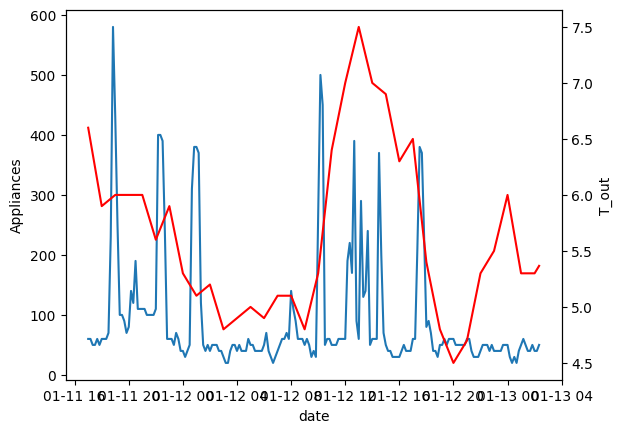

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset = conso.loc[0:200,:]
sns.lineplot(data = dataset, x = 'date', y = 'Appliances')
ax2 = plt.twinx()
sns.lineplot(data=dataset, x = 'date', y = 'T_out', color="red", ax=ax2)



> Représenter et décrire la distribution de ces deux variables (i.e. en oubliant la dimension temporelle)

c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Axes: xlabel='Count', ylabel='T_out'>

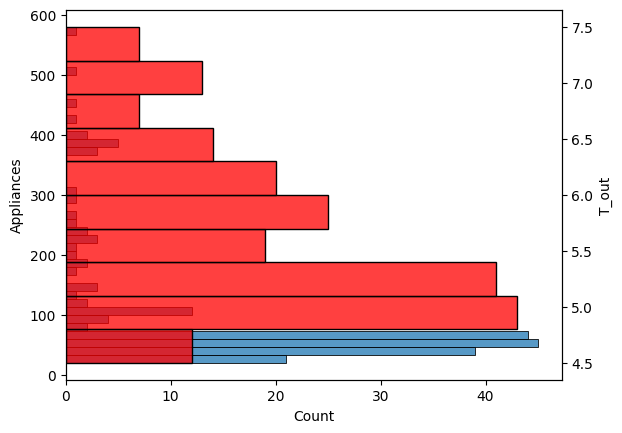

In [36]:
dataset = conso.loc[0:200,:]
sns.histplot(data = dataset, y = 'Appliances')
ax2 = plt.twinx()
sns.histplot(data=dataset, y = 'T_out', color="red", ax=ax2)


c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Appliances', ylabel='T_out'>

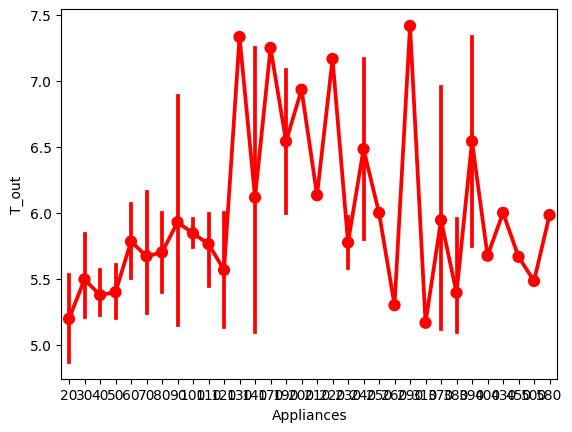

In [37]:
sns.pointplot(data=dataset, x = 'Appliances', y = 'T_out', color="red")

> Représenter et comparer les histogrammes des 9 variables d'humidité (`HR_i`) en les affichant dans une figure 3x3. Pourquoi selon vous la forme de la distributon de `RH_6` se distingue fortement des autres (on pourra consulter le plan des capteurs).

c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\remi\anaconda3\envs\python3_10_infoia\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

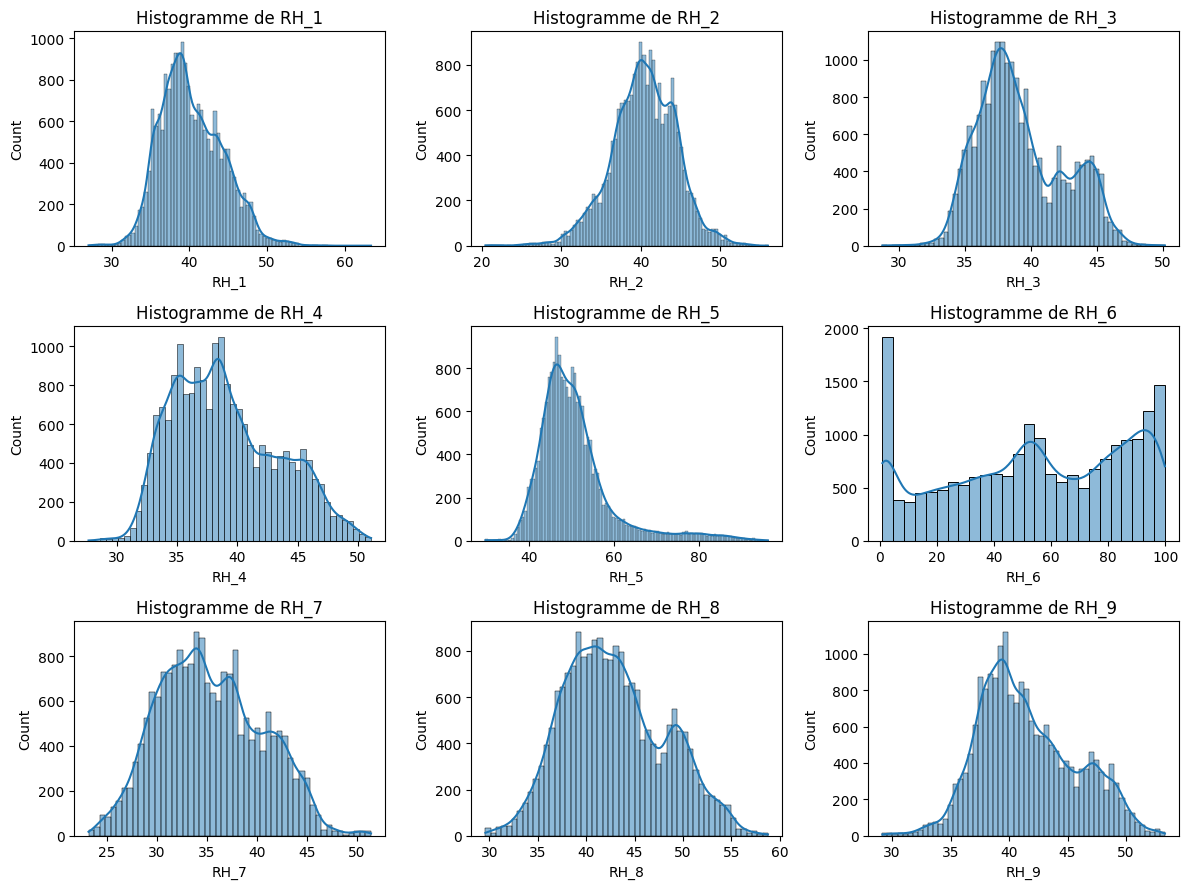

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables d'humidité (HR_i)
humidity_variables = [f'RH_{i}' for i in range(1,10)]

# Créer une figure 3x3 pour les histogrammes
plt.figure(figsize=(12, 9))

# Utilisez une boucle pour créer les histogrammes
for i, variable in enumerate(humidity_variables):
    plt.subplot(3, 3, i + 1)  # Configurez la sous-trame correspondante
    sns.histplot(conso[variable], kde=True)  # Créez un histogramme avec une estimation de la densité
    plt.title(f'Histogramme de {variable}')  # Ajoutez un titre

# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez la figure
plt.show()


> Contrairement aux autre variables, vérifier que la variable `lights` ne prend que quelques valeurs. Proposer une représentation convenable pour représenter cette distribution discrète. 

In [46]:
conso.lights.value_counts()

# A table or bars chart

lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64

## Etude des corrélations

Les données étudiées ici sont évidemment de nature temporelle. Il existe des outils statistiques pour étudier des [auto-corrélations](https://en.wikipedia.org/wiki/Autocorrelation) dans une série temporelle et les [cross correlations](https://en.wikipedia.org/wiki/Cross-correlation) entre deux séries temporelles.

Pour ce TP, on se limitera cependant à une étude de la corrélation sans prendre en compte la dimension temporelle, ce qui donne déjà des indications importantes entre les corrélations entre les variables.

> Vérifier que la corrélation entre  `T_out`et `T_6`est très élevée.

In [50]:
matrix_cor = conso.corr(numeric_only=True)
matrix_cor.T6.T_out

0.9747866900664598

> Etudier la matrice corrélation entre toutes les variables de température. Que pouvez-vous en déduire dans la perspective de la prédiction de la variables `Appliances`? Même question pour les variables d'humidité.

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix_cor, annot=True, fmt='.1')
plt.show()

> Calculer la correlation entre `Appliances` et toutes les autres variables.

In [52]:
matrix_cor.Appliances

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
Name: Appliances, dtype: float64

## Regression simple de la consomation de T_out par T1

La [bibliothèque scikit-learn](https://scikit-learn.org/stable/index.html), qui est entièrement dédiée aux méthodes d'apprentissage automatique, permet d'ajuster des [modèles de régression linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) sur les données. 

Les procédures de scikit-learn nécessitent de manipuler les données sous forme de tableaux numpy.

Pour se positionner dans un contexte non temporel et ignorer la corrélation dans le temps de T1 et T_out,  on commence par sous-échantilloner drastiquement les données. On se retrouve ainsi (artificiellement) dans une situation plus standard et plus adaptée à l'étude d'un premier modèle de régression linéaire simple. 

Bien sûr, idéalement il ne faudrait pas procéder ainsi mais au contraire conserver les séries temporelles complètes et étudier des modèles de regression pour séries temporelles.

In [62]:
from sklearn.utils import resample
T1 = conso.T1.values
Tout = conso.T_out.values
T1_mini,Tout_mini = resample(T1,
                             Tout,
                             random_state=0,
                             n_samples=500)

In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(); # instanciation d'un modèle de regression lineaire
reg.fit(T1_mini.reshape(-1, 1) ,Tout_mini); # ajustement par moindres carrés sur les
# données
# le reshape est nécessaire pour que T1_mini apparaisse comme une matrice
# à une seule colonne, et pas comme un vecteur ligne

On peut ensuite récupérer facilement les coefficients du modèle de régression, tout d'abord le terme constant:

In [55]:
reg.intercept_

-42.20978724753001

et le coefficient pour T1:

In [56]:
reg.coef_

array([2.27982528])

La fonction `predict` permet de donner les prédictions du modèle en des points donnés:

In [57]:
reg.predict([[20.5], [18]])

array([ 4.5266309 , -1.17293229])

> Retrouver ces prédictions à l'aide des coefficients du modèle :  

In [58]:
y = reg.coef_*np.array([20.5, 18]) + reg.intercept_
print(y)

[ 4.5266309  -1.17293229]


> Afficher sur un même graphique le nuage des points (T1_mini,Tout_mini) ainsi que la droite de régression ajustée.

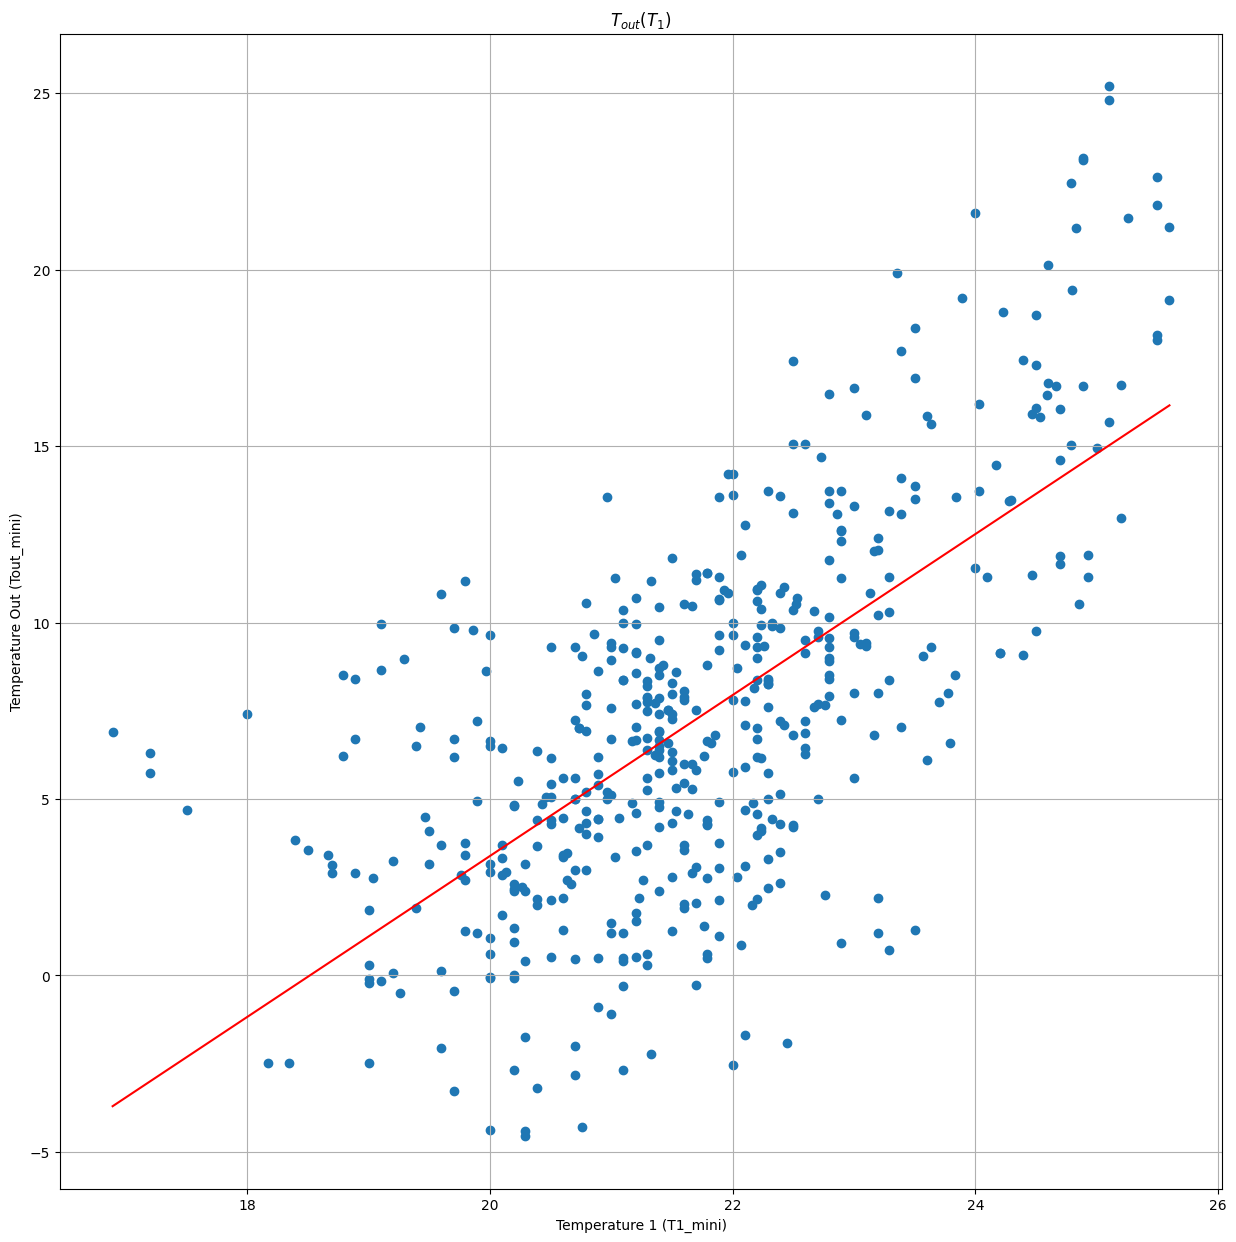

In [63]:
t1_pred = np.linspace(min(T1_mini), max(T1_mini), 500)  # 500 pontos espaçados uniformemente
t_out_pred = reg.predict(t1_pred.reshape(-1, 1))

fig = plt.figure(figsize=(15,15))

plt.scatter(T1_mini, Tout_mini)
plt.plot(t1_pred,t_out_pred, color="red")

plt.title("$T_{out}(T_1)$")
plt.xlabel('Temperature 1 (T1_mini)')
plt.ylabel('Temperature Out (Tout_mini)')
plt.grid(which="both")


plt.show()


On définit le résidu de l'observation $i$ par $\hat \epsilon_i = Y_i - {\hat Y}_i  =   {T_{out}}_i - {\hat T_{out}}_i $. L'analyse des résidus est un ensemble de représentations graphiques qui vise notamment à identifier si les résidus contiennent encore de l'information qui pourrait être expliquée par les régresseurs.

> Calculer le vecteur des résidus et afficher ce dernier en fonction de ${T_1}_{mini}$ . On notera que le nuage présente une forme légèrement en U, ce qui pourrait suggérer d'ajouter comme régresseur la variable ${T_1}_{mini}^2$ dans le modèle  (vous pouvez essayer).

In [65]:
np.sort(Tout_mini)
residu = Tout_mini - t_out_pred
print(residu)

[  9.90353834  17.2137442    8.90728339  17.31748924  17.26102843
  10.55456762  14.83144014   8.341646     7.55185185  13.97872437
   8.8055969   14.09913608  20.67600861  19.01954779  10.66308698
  16.60662617  14.83349869  16.49370455   5.88724374   7.39744959
  12.90765545  12.6678613    2.56140049   5.38827302   5.64847887
  19.64201806  10.55222392   7.03623929   5.98930229   4.04950815
  14.409714     3.38658653   2.84679238  18.29033157   7.00053742
   7.31074328   6.52094914  24.86448832  16.65802751   3.3515667
  22.24510589  15.80531175   9.5155176    8.79239012  20.08592931
  10.91280183  12.22300769  10.99988021  12.62675273  10.80362526
  10.94716444   3.84070363   9.88424282  11.36111534   8.5713212
  10.81486039  13.35839958   8.10193877  10.52881129  10.78901714
  12.61588967  10.99276219   4.40296804  15.39650723  -1.07662025
  17.85025228   4.61045813  -1.79600268   2.86420318   4.45774236
   5.68461489   8.47815408   8.5550266    8.03189912   8.50877164
   8.3023108

> Calculer l'erreur quadratique moyenne $MSE = \frac 1n \sum_{i=1}^n \left( {T_{out}}_i - {\hat Y_{out}}_i \right)^2$. 

In [67]:
mse = (1/500) * ( np.sum((Tout_mini - t_out_pred)**2) )
mse = np.mean((Tout_mini - t_out_pred)**2)

print(mse)

65.29679032691188


En régression, le modèle le plus basique possible est celui qui prédit tout le temps par une constante, et on peut facilement vérifier que pour minimiser la MSE il faut alors prédire par la moyenne $\bar Y$ de la variable à prédire Y (pour ce TP prendre évidemment $Y = T_{out}$) .

Ce modèle peut être aussi défini comme un modèle de regression linéaire avec un seul feature qui est constant et égal à 1 (et le coefficient de ce feature vaut alors $\bar Y$.

La MSE de ce modèle basique vaut par définition la variance de la variable à prédire : 
$$ 
MSE_{basique} = \frac 1n \sum_{i=1}^n \left( Y_i - {\hat Y}_i \right)^2 
= \frac 1n \sum_{i=1}^n \left( Y_i - \bar Y \right)^2 
= var(Y)
$$
On définit alors le coefficient de détermination d'un modèle de régression par  $$ R^2 = 1 - \frac{MSE}{var(Y)} .$$
Ce score mesure la qualité de l'ajustement du modèle sur les données. Il est compris entre 0 et 1. Un score près de 1 correspond à un très bon ajustement alors qu'un score proche de 0 signifie que la MSE du modèle est aussi élevée que celle du modèle basique, autrement dit que le modèle évalué ne fait pas mieux que le modèle le plus basique.

On calcule le coefficient de détermination $R^2$ avec la fonction score :

In [23]:
reg.score(T1.reshape(-1,1),Tout)

0.4651013176906723

## Regression multiple

### Scénario 1 : prédiction à chaque instant

Nous allons maintenant passer à l'étude d'un modèle de régression multiple. On s'intéresse au problème (difficile) de la prédiction de la consommation  au temps t par toutes les autres variables  au temps t (à l'exception de la variable date).

In [68]:
data = conso_train.to_numpy()  
Appliances_train = data[:,1]
X_features_train = data[:,2:]

In [69]:
reg2 = LinearRegression(); 
reg2.fit(X_features_train,Appliances_train);

> Afficher le vecteur des coefficients estimés

In [70]:
a2 = reg2.coef_
b2 = reg2.intercept_
print(a2,b2)

[  2.14479389  -5.20334797  13.11058806 -14.08748091 -12.83958641
  27.47600398   8.30536306  -4.0222987   -2.13829587  -1.40052356
   0.10545791   8.55558664   0.31908382   1.11683514  -0.62909333
   8.66185548  -5.76575293 -14.29054444  -0.84946495 -10.43189166
   0.211249    -0.68244469   1.02124184   0.19606469   4.54146081] -38.19857583515902


> Retrouver cette estimation grâce à la formule des moindres carrés :
$$ \hat \theta = (X'X)^{-1} X' y. $$
En utilisant les calculs matricielle de numpy, on note des différences assez importantes par rapport au coefficient renvoyé par sckit-learn (probablement dues à un calcul approximatif de l'inverse pour numpy).

In [73]:
X_features_train = X_features_train.astype('float64')
Appliances_train = Appliances_train.astype('float64')

X_with_intercept = np.hstack([np.ones((X_features_train.shape[0], 1)), X_features_train])
theta_hat = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(Appliances_train)

print("Coefficients estimés avec la formule des moindres carrés:", theta_hat)

Coefficients estimés avec la formule des moindres carrés: [-38.19857583   2.14479389  -5.20334797  13.11058806 -14.08748091
 -12.83958641  27.47600398   8.30536306  -4.0222987   -2.13829587
  -1.40052356   0.10545791   8.55558664   0.31908382   1.11683514
  -0.62909333   8.66185548  -5.76575293 -14.29054444  -0.84946495
 -10.43189166   0.211249    -0.68244469   1.02124184   0.19606469
   4.54146081]


> Calculer le coefficient de détermination sur les données d'apprentissage. L'ajustement est-il bon ?

In [77]:
r2 = reg2.score(X_features_train, Appliances_train)
print(r2)

0.17115779728548897


> Calculer les prédictions sur les données du mois de mai et comparer aux vraies valeurs. Calculer le coefficient de détermination $R^2$ sur les données de mai, vérifier que ce dernier est clairement inférieure au $R^2$ calculé sur les données d'apprentissage. Est-ce moral ?

In [80]:
data2 = conso_test.to_numpy()  
Appliances_test = data2[:,1]
X_features_test = data2[:,2:]

Appliances_predict = reg2.predict(X_features_test)
r_squared_test = reg2.score(X_features_test, Appliances_test)
print(r_squared_test)


0.09047525458173067


### Scénario 2 : features historiques

Dans la réalité pour faire la prédiction au temps t, on dispose de l'historique des consommations du passé. On peut imaginer des scénarios variés suivant ce que l'on peut prendre comme features à l'instant où l'on souhaite faire la prédiction de consommation.

> Pour les données avant mai d'une part, et pour les données de mai d'autre part, créer une nouvelle colonne dans les features qui contient la consommation enregistrée 10 minutes plus tôt. Effectuer l'ajustement pour ce nouveau modèle de régression et comparer les performances de ce modèle à celui du modèle précédent.

In [88]:
conso["conso_p10"] = conso.Appliances.shift(fill_value = 60)

conso_train2 = conso.loc[conso["date"]<"2016-05-01"]
conso_test2  = conso.loc[conso["date"]>"2016-05-01"]

conso_train2 = np.array(conso_train2)
Appliances_train2 = conso_train2[:,1:2]
X_train2 = conso_train2[:,2:]

reg3 = LinearRegression()
reg3.fit(X_train2,Appliances_train2)

conso_test2 = np.array(conso_test2)
Appliances_test2 = conso_test2[:,1:2]
X_test2 = conso_test2[:,2:]

print(reg3.score(X_train2 , Appliances_train2))
print(reg3.score(X_test2  , Appliances_test2)) 

0.5838905580934323
0.5226318353196675


### (En Bonus!) Scénario 3 : Données agrégées et features historiques 

Dans ce dernier scénario, on suppose que l'on ne dispose pas, au moment de la prédiction, de la consommation des 10 minutes précédentes (Scénario 2), mais que l'on dispose en revanche de la consommation totale de la journée précédente (i.e. la somme).

> Construire la matrice des features qui correspond à ce problème et ajuster un modèle de régression linéaire multiple pour construire le prédicteur. Discuter la qualité de l'ajustement.

In [31]:
### It's gonna be done during the week, I didn't had time this weekend, sorry ###








**Remarque**  : la librairie [statsmodels](https://www.statsmodels.org/stable/) permet une étude plus fine du modèle de la régression linéaire, avec des procédures statistiques pour discuter l'estimation du modèle, des tests d'hypothèse, des régions de confiance sur les quantités d'interêt du modèle. Ces approches nécessitent une approche très statistique du modèle linéaire que nous n'abordons pas dans ce cours.